In [2]:
!pip install tensorflow

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [5]:
df = pd.read_csv("dataset.csv")
df = df.dropna()

df.head()


,Name,Gender,Relationship,Age,City,Sector,Income,Needs,Expenses,Saving
0,Sakshi Bala Verma,Female,Unmarried,51-60,Ghaziabad,Private,1193174,596587,357952,238635
1,Deepika Kumari Gupta,Female,Divorced,26-35,Prayagraj,Business,1081232,540616,324369,216247
2,Arjun Narayan Saxena,Male,Single,21-25,Chandigarh,Business,857499,428749,257249,171501
3,Sumit Lal Yadav,Male,Single,36-50,Dehradun,Public,1252198,626099,375659,250440
4,Aaditya Nath Malhotra,Male,Single,36-50,Bhopal,Public,866550,433275,259965,173310


In [23]:
data = df[["Income", "Needs", "Expenses", "Saving"]]

In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [32]:
# Cap extreme values for visualization
limit = np.percentile(actual_saving, 95)

actual_plot = np.clip(actual_saving, 0, limit)
predicted_plot = np.clip(predicted_saving, 0, limit)

In [33]:
X = []
y = []

for i in range(len(scaled_data) - 1):
    X.append(scaled_data[i, 0:3])   # Income, Needs, Expenses
    y.append(scaled_data[i + 1, 3]) # Next Saving

X = np.array(X)
y = np.array(y)

# Reshape for LSTM: [samples, timesteps, features]
X = X.reshape((X.shape[0], 1, 3))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, 3)))
model.add(Dense(1))

model.compile(
    optimizer="adam",
    loss="mse"
)

model.summary()

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.7640e-05 - val_loss: 5.9147e-04
Epoch 2/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.4293e-05 - val_loss: 5.8415e-04
Epoch 3/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3547e-05 - val_loss: 5.8550e-04
Epoch 4/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.4066e-05 - val_loss: 5.8432e-04
Epoch 5/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3476e-05 - val_loss: 5.8931e-04
Epoch 6/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3407e-05 - val_loss: 5.8338e-04
Epoch 7/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3432e-05 - val_loss: 5.8677e-04
Epoch 8/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3452e-05 - val_loss: 5.8325e-04
Epoch 9/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2914e-05 - val_loss: 5.8594e-04
Epoch 10/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.3127e-05 - val_loss: 5.8314e-04
Epoch 11/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss

In [37]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2473e-05 - val_loss: 5.8289e-04
Epoch 2/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2088e-05 - val_loss: 5.8448e-04
Epoch 3/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2371e-05 - val_loss: 5.8638e-04
Epoch 4/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.1948e-05 - val_loss: 5.8695e-04
Epoch 5/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2417e-05 - val_loss: 5.8376e-04
Epoch 6/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.1976e-05 - val_loss: 5.8507e-04
Epoch 7/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2191e-05 - val_loss: 5.8277e-04
Epoch 8/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2649e-05 - val_loss: 5.8284e-04
Epoch 9/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2312e-05 - val_loss: 5.8283e-04
Epoch 10/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2120e-05 - val_loss: 5.8441e-04
Epoch 11/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss

In [38]:
predicted = model.predict(X_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [39]:
# Prepare structure for inverse scaling
temp_pred = np.zeros((len(predicted), 4))
temp_pred[:, 3] = predicted.flatten()

predicted_saving = scaler.inverse_transform(temp_pred)[:, 3]

temp_actual = np.zeros((len(y_test), 4))
temp_actual[:, 3] = y_test

actual_saving = scaler.inverse_transform(temp_actual)[:, 3]

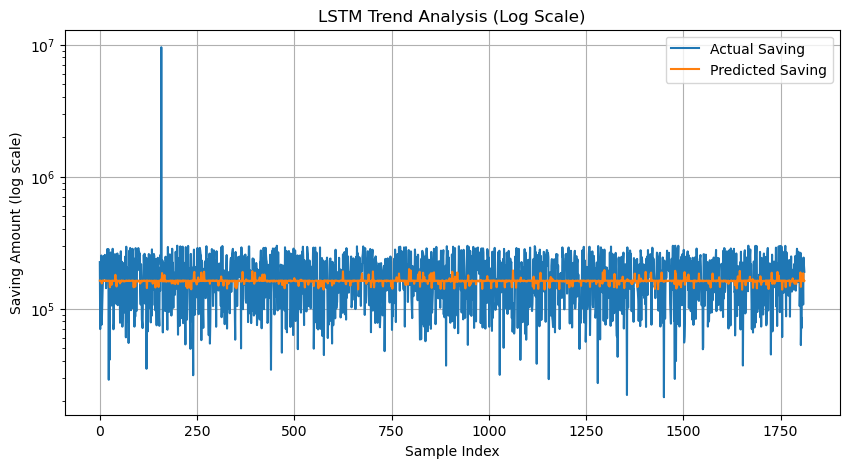

In [40]:
plt.figure(figsize=(10,5))
plt.plot(actual_saving, label="Actual Saving")
plt.plot(predicted_saving, label="Predicted Saving")

plt.yscale("log")
plt.title("LSTM Trend Analysis (Log Scale)")
plt.xlabel("Sample Index")
plt.ylabel("Saving Amount (log scale)")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from matplotlib.ticker import FuncFormatter

def rupee_formatter(x, pos):
    if x >= 1e7:
        return f"₹{x/1e7:.1f} Cr"
    elif x >= 1e5:
        return f"₹{x/1e5:.1f} L"
    elif x >= 1e3:
        return f"₹{x/1e3:.1f} K"
    else:
        return f"₹{int(x)}"


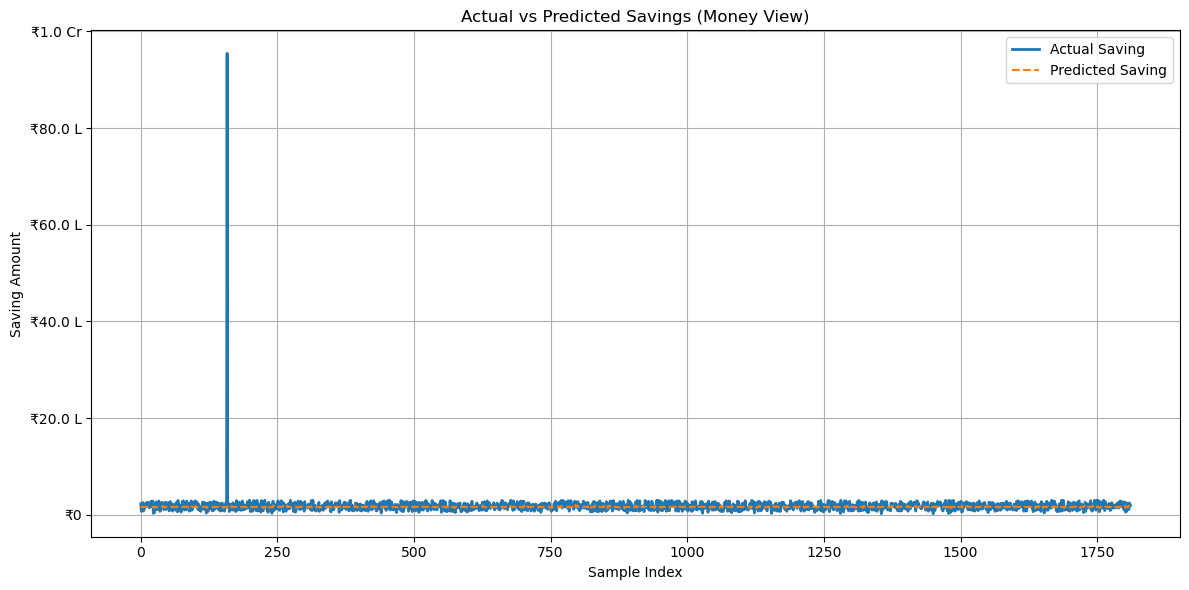

In [42]:
plt.figure(figsize=(12,6))

plt.plot(actual_saving, label="Actual Saving", linewidth=2)
plt.plot(predicted_saving, label="Predicted Saving", linestyle="--")

plt.title("Actual vs Predicted Savings (Money View)")
plt.xlabel("Sample Index")
plt.ylabel("Saving Amount")

plt.gca().yaxis.set_major_formatter(FuncFormatter(rupee_formatter))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
upper_limit = np.percentile(actual_saving, 95)

actual_plot = np.clip(actual_saving, 0, upper_limit)
predicted_plot = np.clip(predicted_saving, 0, upper_limit)


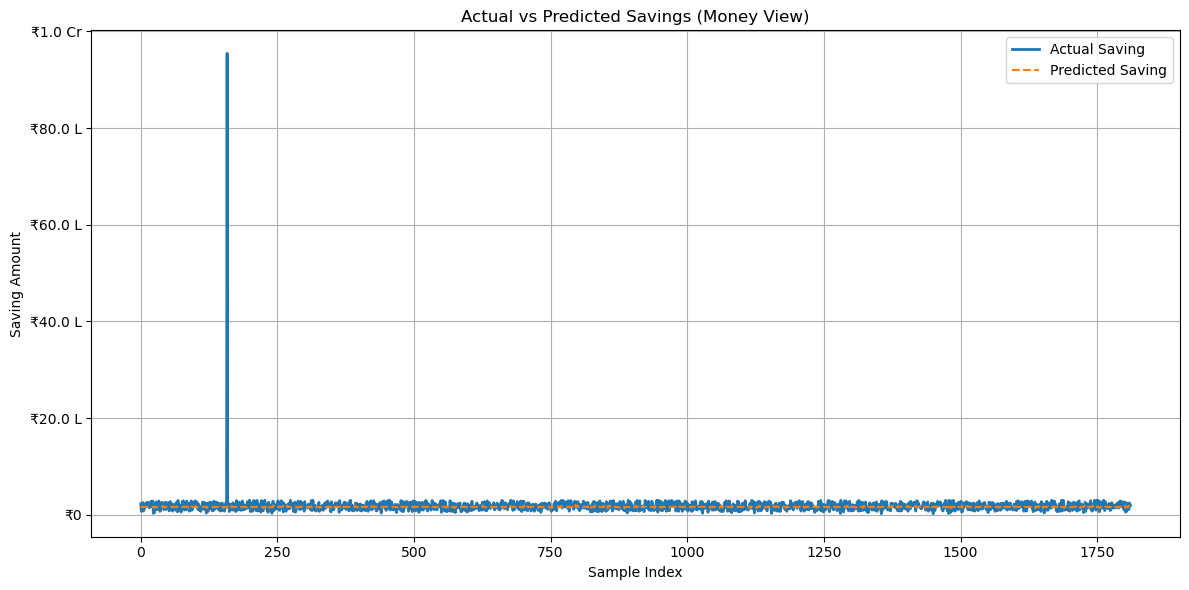

In [44]:
plt.figure(figsize=(12,6))

plt.plot(actual_saving, label="Actual Saving", linewidth=2)
plt.plot(predicted_saving, label="Predicted Saving", linestyle="--")

plt.title("Actual vs Predicted Savings (Money View)")
plt.xlabel("Sample Index")
plt.ylabel("Saving Amount")

plt.gca().yaxis.set_major_formatter(FuncFormatter(rupee_formatter))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
